In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [2]:
data = pd.read_csv("breast_cancer_data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.drop(['id','Unnamed: 32',],axis=1,inplace=True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [11]:
data["diagnosis"].map({'B':0,'M':1})

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [12]:
 data["diagnosis"] = data["diagnosis"].map({'B':0,'M':1})

In [13]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
X = data.drop(['diagnosis'],axis=1)

In [16]:
y = data['diagnosis']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [18]:
classifier = LogisticRegression()

In [19]:
classifier.fit(X_train,y_train)

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
classifier.score(X_train,y_train)

0.9553805774278216

In [21]:
classifier.score(X_test,y_test)

0.9627659574468085

In [22]:
! pip install imbalanced_learn

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train,y_train)

In [25]:
classifier_res=LogisticRegression()
classifier_res.fit(X_res,y_res) 

c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_train.value_counts()
y_res.value_counts()

1    236
0    236
Name: diagnosis, dtype: int64

In [27]:
y_pred = classifier_res.predict(X_test)
from sklearn.metrics import confusion_matrix
import numpy as np
confusion_matrix(y_test,y_pred)

array([[115,   6],
       [  4,  63]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       121
           1       0.91      0.94      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.94       188
weighted avg       0.95      0.95      0.95       188



In [29]:
    clf = LogisticRegression()
    clf.fit(X_train,y_train)

    score = clf.score(X_train,y_train)
    print(f"Train Accuracy for {clf.__class__.__name__} is {score}")

    score = clf.score(X_test, y_test)
    print(f"Test Accuracy for {clf.__class__.__name__} is {score}")

    print("==================================")

Train Accuracy for LogisticRegression is 0.9553805774278216
Test Accuracy for LogisticRegression is 0.9627659574468085


c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)

    score = clf.score(X_train,y_train)
    print(f"Train Accuracy for {clf.__class__.__name__} is {score}")

    score = clf.score(X_test, y_test)
    print(f"Test Accuracy for {clf.__class__.__name__} is {score}")

    print("==================================")

Train Accuracy for RandomForestClassifier is 1.0
Test Accuracy for RandomForestClassifier is 0.9627659574468085


In [31]:
clf.feature_importances_

array([0.03680612, 0.01687725, 0.03453394, 0.03588515, 0.00567345,
       0.01263762, 0.04981149, 0.15286664, 0.00514332, 0.00399007,
       0.01251377, 0.00313289, 0.01750935, 0.02175307, 0.00301205,
       0.00513059, 0.00947907, 0.00425707, 0.00461446, 0.00516775,
       0.09713518, 0.01607045, 0.11739364, 0.09351764, 0.01422246,
       0.01644852, 0.02744857, 0.15370738, 0.01631767, 0.00694339])

In [32]:
pd.Series(clf.feature_importances_,index=clf.feature_names_in_)

radius_mean                0.036806
texture_mean               0.016877
perimeter_mean             0.034534
area_mean                  0.035885
smoothness_mean            0.005673
compactness_mean           0.012638
concavity_mean             0.049811
concave points_mean        0.152867
symmetry_mean              0.005143
fractal_dimension_mean     0.003990
radius_se                  0.012514
texture_se                 0.003133
perimeter_se               0.017509
area_se                    0.021753
smoothness_se              0.003012
compactness_se             0.005131
concavity_se               0.009479
concave points_se          0.004257
symmetry_se                0.004614
fractal_dimension_se       0.005168
radius_worst               0.097135
texture_worst              0.016070
perimeter_worst            0.117394
area_worst                 0.093518
smoothness_worst           0.014222
compactness_worst          0.016449
concavity_worst            0.027449
concave points_worst       0

In [33]:
clf.feature_names_in_

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [34]:
feature_imp = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending = False)

In [35]:
feature_imp.index

Index(['concave points_worst', 'concave points_mean', 'perimeter_worst',
       'radius_worst', 'area_worst', 'concavity_mean', 'radius_mean',
       'area_mean', 'perimeter_mean', 'concavity_worst', 'area_se',
       'perimeter_se', 'texture_mean', 'compactness_worst', 'symmetry_worst',
       'texture_worst', 'smoothness_worst', 'compactness_mean', 'radius_se',
       'concavity_se', 'fractal_dimension_worst', 'smoothness_mean',
       'fractal_dimension_se', 'symmetry_mean', 'compactness_se',
       'symmetry_se', 'concave points_se', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se'],
      dtype='object')

<AxesSubplot:>

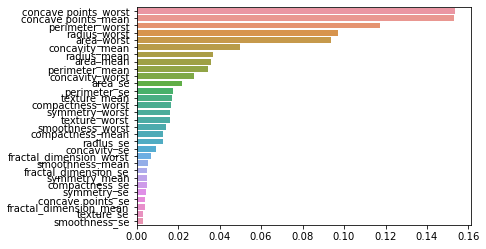

In [36]:
import seaborn as sns
sns.barplot(x = feature_imp, y = feature_imp.index)  

In [38]:
from sklearn.ensemble import AdaBoostClassifier  

In [39]:
clf = AdaBoostClassifier()

In [41]:
clf.fit(X_train,y_train)

score = clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {score}")

score = clf.score(X_test, y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {score}")

print("==================================")

Train Accuracy for AdaBoostClassifier is 1.0
Test Accuracy for AdaBoostClassifier is 0.9521276595744681


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

score = clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {score}")

score = clf.score(X_test, y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {score}")

print("==================================")

Train Accuracy for GradientBoostingClassifier is 1.0
Test Accuracy for GradientBoostingClassifier is 0.9574468085106383


In [45]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_features=5)
clf.fit(X_train,y_train)

score = clf.score(X_train,y_train)
print(f"Train Accuracy for {clf.__class__.__name__} is {score}")

score = clf.score(X_test, y_test)
print(f"Test Accuracy for {clf.__class__.__name__} is {score}")

print("==================================")

Train Accuracy for GradientBoostingClassifier is 1.0
Test Accuracy for GradientBoostingClassifier is 0.9521276595744681


In [46]:
X_train.shape

(381, 30)